In [2]:
import pandas as pd
import time
import matplotlib.pyplot as plt
from selenium import webdriver 
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver import ActionChains
import re

from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException

In [91]:
### full code
# Create driver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
actions = ActionChains(driver)

page_url = "https://tolkiengateway.net/wiki/Category:Characters_in_The_Lord_of_the_Rings"
 # list with character's key, name and url to his website
characters_list = [] 
# list with book's key and name 
books_list=[] 
# pivot-Table with book key and character key
book_character_list=[] 
#book key 
book_index=0
# character kex for all books
character_index=0

driver.get(page_url)

#find div with characters 
table_with_characters=driver.find_element(By.CLASS_NAME, 'mw-category')

#find all characters inside of div with characters 
character_elements=table_with_characters.find_elements(By.TAG_NAME, 'a')

#save character
for character in character_elements:
    character_url=character.get_attribute('href')
    character_name=character.text
    if "(" in character_name or ")" in character_name: 
        character_name=re.sub("[\(\[].*?[\)\]]", "", character_name)
    
    #get other names 
       
    # Open a new window
    driver.execute_script("window.open('');")

    # Switch to the new window and open new URL
    driver.switch_to.window(driver.window_handles[1])
    driver.get(character_url)
    
    try:
        other_names_section_header=driver.find_element(By.XPATH, "//td[contains(text(),'names')]")
        other_names_section_parent=other_names_section_header.find_element(By.XPATH, "..")
        other_names_section=other_names_section_parent.find_element(By.XPATH, ".//td[contains(text(),'names')=false]")
        other_names=other_names_section.text.split("\n")
        other_names=[other_name for other_name in other_names if 'below' not in other_name]
        other_names= [re.sub("[\(\[].*?[\)\]]", "", other_name) for other_name in other_names]
        other_names= [other_name.replace('\"','') for other_name in other_names]
    except NoSuchElementException:
        other_names=[]
    # Closing new_url tab
    driver.close()

    # Switching to old tab
    driver.switch_to.window(driver.window_handles[0])        
    
    characters_list.append({"character_key": character_index, "character_name": character_name, "character_firstname":character_name.split(' ', 1)[0], "other_names": other_names, "character_url": character_url})
    character_index=character_index+1

driver.close()
charcters=pd.DataFrame(characters_list)


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=111.0.5563.111)
Stacktrace:
Backtrace:
	(No symbol) [0x0066DCE3]
	(No symbol) [0x006039D1]
	(No symbol) [0x00514DA8]
	(No symbol) [0x004FD0D3]
	(No symbol) [0x0055EA8B]
	(No symbol) [0x0056D093]
	(No symbol) [0x0055ACC6]
	(No symbol) [0x00536F68]
	(No symbol) [0x005380CD]
	GetHandleVerifier [0x008E3832+2506274]
	GetHandleVerifier [0x00919794+2727300]
	GetHandleVerifier [0x0091E36C+2746716]
	GetHandleVerifier [0x00716690+617600]
	(No symbol) [0x0060C712]
	(No symbol) [0x00611FF8]
	(No symbol) [0x006120DB]
	(No symbol) [0x0061C63B]
	BaseThreadInitThunk [0x76407D69+25]
	RtlInitializeExceptionChain [0x7771BB9B+107]
	RtlClearBits [0x7771BB1F+191]


In [92]:
charcters=pd.DataFrame(characters_list)
charcters

,character_key,character_name,character_firstname,other_names,character_url
0,0,Anborn,Anborn,[],https://tolkiengateway.net/wiki/Anborn
1,1,Angbor,Angbor,[the Fearless],https://tolkiengateway.net/wiki/Angbor
2,2,Aragorn,Aragorn,[],https://tolkiengateway.net/wiki/Aragorn
3,3,Arwen,Arwen,"[Undómiel , Elerondiel , Elrenniel ]",https://tolkiengateway.net/wiki/Arwen
4,4,Barliman Butterbur,Barliman,[Barley],https://tolkiengateway.net/wiki/Barliman_Butte...
5,5,Barrow-wights,Barrow-wights,[],https://tolkiengateway.net/wiki/Barrow-wights
6,6,Beechbone,Beechbone,[],https://tolkiengateway.net/wiki/Beechbone
7,7,Beregond,Beregond,[],https://tolkiengateway.net/wiki/Beregond
8,8,Bergil,Bergil,[],https://tolkiengateway.net/wiki/Bergil


In [86]:
for character in characters_list:
    if "(" in character["character_name"] or ")" in character["character_name"]: 
        character["character_name"]=re.sub("[\(\[].*?[\)\]]", "", character["character_name"])
        print(character["character_name"])


Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
Harding 
H

In [84]:
characters_list

[{'character_key': 0,
  'character_name': 'Anborn',
  'character_firstname': 'Anborn',
  'other_names': [],
  'character_url': 'https://tolkiengateway.net/wiki/Anborn'},
 {'character_key': 1,
  'character_name': 'Angbor',
  'character_firstname': 'Angbor',
  'other_names': ['"the Fearless"'],
  'character_url': 'https://tolkiengateway.net/wiki/Angbor'},
 {'character_key': 2,
  'character_name': 'Aragorn',
  'character_firstname': 'Aragorn',
  'other_names': [],
  'character_url': 'https://tolkiengateway.net/wiki/Aragorn'},
 {'character_key': 3,
  'character_name': 'Arwen',
  'character_firstname': 'Arwen',
  'other_names': ['Undómiel (Q: "Evenstar")',
   'Elerondiel (Q)',
   'Elrenniel (S)'],
  'character_url': 'https://tolkiengateway.net/wiki/Arwen'},
 {'character_key': 4,
  'character_name': 'Barliman Butterbur',
  'character_firstname': 'Barliman',
  'other_names': ['Barley'],
  'character_url': 'https://tolkiengateway.net/wiki/Barliman_Butterbur'},
 {'character_key': 5,
  'characte

In [79]:
### full code
# Create driver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
actions = ActionChains(driver)

page_url = "https://tolkiengateway.net/wiki/Peregrin_Took"

driver.get(page_url)

other_names_section_header=driver.find_element(By.XPATH, "//td[contains(text(),'names')]")
other_names_section_parent=other_names_section_header.find_element(By.XPATH, "..")
other_names_section=other_names_section_parent.find_element(By.XPATH, ".//td[contains(text(),'names')=false]")
other_names=other_names_section.text.split("\n")

other_names=[ other_name for other_name in other_names if 'below' not in other_name]

driver.close()
other_names

['Pippin', 'Ernil i Pheriannath', 'Thain Peregrin I', 'Razanur Tûk']

In [21]:
### full code
# Create driver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
actions = ActionChains(driver)

#page_urls = ["https://lotr.fandom.com/wiki/The_Lord_of_the_Rings:_The_Fellowship_of_the_Ring",  "https://lotr.fandom.com/wiki/The_Lord_of_the_Rings:_The_Two_Towers", "https://lotr.fandom.com/wiki/The_Lord_of_the_Rings:_The_Return_of_the_King"]
page_urls = ["https://lotr.fandom.com/wiki/The_Lord_of_the_Rings:_The_Fellowship_of_the_Ring"]
#page_urls = ["https://lotr.fandom.com/wiki/The_Lord_of_the_Rings:_The_Fellowship_of_the_Ring"]
 # list with character's key, name and url to his website
characters_list = [] 
# list with book's key and name 
books_list=[] 
# pivot-Table with book key and character key
book_character_list=[] 
#book key 
book_index=0
# character kex for all books
character_index=0
    
    
for page_url in page_urls: 
    #open url 
    driver.get(page_url)

    #click accept cookies if popup shows
    #identify element
    coockies=driver.find_elements(By.XPATH, '//div[text()="ANNEHMEN"]')
    if(len(coockies)>0):
        driver.find_element(By.XPATH, '//div[text()="ANNEHMEN"]').click()  
    #save book name
    book_name=driver.find_element(By.CLASS_NAME, 'page-header__title').text

    #find div with characters 
    table_with_characters=driver.find_element(By.CLASS_NAME, 'appearances')
    #find all characters inside of div with characters 
    character_elements=table_with_characters.find_elements(By.TAG_NAME, 'li')
    
    #save character
    for character in character_elements:

        character_url=character.find_element(By.TAG_NAME, 'a').get_attribute('href')
        character_name=character.find_element(By.TAG_NAME, 'a').text
        
        #check if addiitional info exists
        additional_info=character.find_elements(By.TAG_NAME, 'small')
        if(len(additional_info)>0):
            character_add_infos=character.find_element(By.TAG_NAME, 'small').text
            character_add_info = character_add_infos.split(", ")
            character_add_info = character_add_infos.replace(") (", ", ").replace(")", "").replace("(", "")
        else:
            character_add_info=None
             # Load a page 

        #get other names 
       
        # Open a new window
        driver.execute_script("window.open('');")

        # Switch to the new window and open new URL
        driver.switch_to.window(driver.window_handles[1])
        driver.get(character_url)
        try:
            other_names_section=driver.find_element(By.XPATH, '//div[@data-source="othernames"]')
            other_names_str=other_names_section.find_element(By.CLASS_NAME, 'pi-data-value').text
            other_names_str = re.sub('\[\d\]', '', other_names_str)
            other_names_str=other_names_str.replace(",\n","; ")
            other_names_str=other_names_str.replace("\n","; ")
            other_names_str=other_names_str.replace(", ","; ")
            other_names=other_names_str.split("; ")
        except NoSuchElementException:
            other_names=[]
        # Closing new_url tab
        driver.close()

        # Switching to old tab
        driver.switch_to.window(driver.window_handles[0])        
        
        
        
        
        #add character to characters_list and to book_character_list 
        if (next((item for item in characters_list if item["character_name"] ==character_name), None))==None: 
            characters_list.append({"character_key": character_index, "character_name": character_name, "character_firstname":character_name.split(' ', 1)[0], "other_names": other_names, "character_url": character_url})
            book_character_list.append({"book_key": book_index, "character_key": character_index, "add_info": character_add_info})
            character_index=character_index+1
        else: 
            book_character_list.append({"book_key": book_index, "character_key": next(item for item in characters_list if item["character_name"] ==character_name)["character_key"], "add_info": character_add_info})

    books_list.append({"key": book_index, "name": book_name})
    book_index=book_index+1
    driver.close()
    
    

In [23]:
charcters=pd.DataFrame(characters_list)
charcters

,character_key,character_name,character_firstname,other_names,character_url
0,0,Albert Dreary,Albert,[],https://lotr.fandom.com/wiki/Albert_Dreary
1,1,Aragorn II Elessar,Aragorn,"[Estel, Thorongil, Elessar (Edhelharn), Telcon...",https://lotr.fandom.com/wiki/Aragorn_II_Elessar
2,2,Arathorn,Arathorn,[],https://lotr.fandom.com/wiki/Arathorn
3,3,Arwen,Arwen,"[Undómiel (Quenya for ""Evenstar"")]",https://lotr.fandom.com/wiki/Arwen
4,4,Balin,Balin,[],https://lotr.fandom.com/wiki/Balin
5,5,Barliman Butterbur,Barliman,[Barley],https://lotr.fandom.com/wiki/Barliman_Butterbur
6,6,Belladonna Took,Belladonna,"[Belladonna Took, Mrs. Bungo Baggins]",https://lotr.fandom.com/wiki/Belladonna_Took
7,7,Bilbo Baggins,Bilbo,"[Mr. Baggins, Bilbo Took (see more)]",https://lotr.fandom.com/wiki/Bilbo_Baggins
8,8,Boromir,Boromir,[],https://lotr.fandom.com/wiki/Boromir
9,9,Bungo Baggins,Bungo,[],https://lotr.fandom.com/wiki/Bungo_Baggins


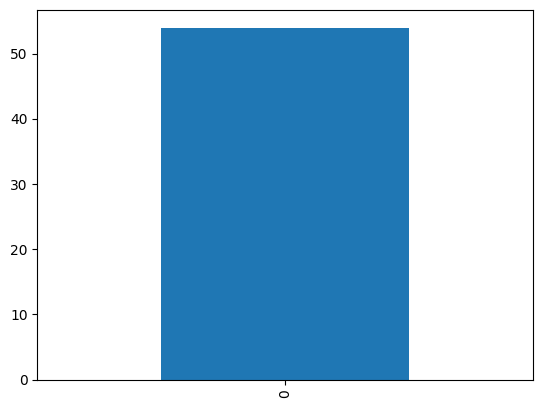

In [14]:
charcters=pd.DataFrame(book_character_list)
charcters['book_key'].value_counts().plot(kind="bar")
plt.show()

# save arrays in csv

In [4]:
import csv
field_names = ['character_key', 'character_name', 'character_url']
with open('characters_list.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames = field_names)
    writer.writeheader()
    writer.writerows(characters_list)

In [5]:
def get_script (script_url, file_name):
    driver = webdriver.Chrome(ChromeDriverManager().install())
    driver.get(script_url)
    script_div=driver.find_element(By.CLASS_NAME, 'scrtext')
    f = open("movie_transcripts/"+file_name+".txt", "w")
    f.write(script_div.text)
    f.close()



In [6]:
characters_list

[{'character_key': 0,
  'character_name': 'Albert Dreary',
  'character_url': 'https://lotr.fandom.com/wiki/Albert_Dreary'},
 {'character_key': 1,
  'character_name': 'Aragorn II Elessar',
  'character_url': 'https://lotr.fandom.com/wiki/Aragorn_II_Elessar'},
 {'character_key': 2,
  'character_name': 'Arathorn',
  'character_url': 'https://lotr.fandom.com/wiki/Arathorn'},
 {'character_key': 3,
  'character_name': 'Arwen',
  'character_url': 'https://lotr.fandom.com/wiki/Arwen'},
 {'character_key': 4,
  'character_name': 'Balin',
  'character_url': 'https://lotr.fandom.com/wiki/Balin'},
 {'character_key': 5,
  'character_name': 'Barliman Butterbur',
  'character_url': 'https://lotr.fandom.com/wiki/Barliman_Butterbur'},
 {'character_key': 6,
  'character_name': 'Belladonna Took',
  'character_url': 'https://lotr.fandom.com/wiki/Belladonna_Took'},
 {'character_key': 7,
  'character_name': 'Bilbo Baggins',
  'character_url': 'https://lotr.fandom.com/wiki/Bilbo_Baggins'},
 {'character_key':